Text(0.5,1,'Linear Regression')

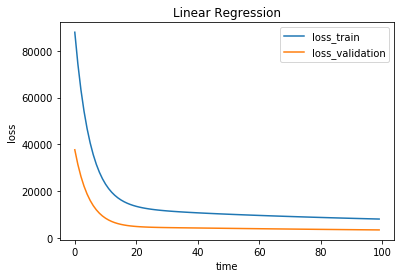

In [11]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


X,Y = load_svmlight_file("housing_scale.txt")

# x add column
row=X.shape[0]
B = np.mat(np.ones((X.shape[0],1)))
X=np.mat(np.c_[X.A,B])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

#参数初始化全零
w=np.mat(np.zeros((14,1)))
learning_rate=0.02
#迭代次数
num=100

loss_train=[]
loss_validation=[]

#模型
def score(w,x):
    return x*w

#loss函数
def loss(x,y,w):
    y=y.reshape(len(y),-1)
    return 0.5*(y-x*w).T*(y-x*w)

#求导
def gradient(x,y,w):
    y=y.reshape(len(y),-1)
    return (-x.T*y+x.T*x*w)/x.shape[0]

#梯度下降
def gradient_descent(w):
    temp_w=w-learning_rate*gradient(x_train,y_train,w)
    return temp_w

#优化
def optimizer(w):
    temp_w=w
    for i in range(num):
        temp_w=gradient_descent(temp_w)
        loss_train.append(loss(x_train,y_train,temp_w)[0,0])
        loss_validation.append(loss(x_test,y_test,temp_w)[0,0])
    return  temp_w

w=optimizer(w)

n = np.arange(num)
plt.plot(n,loss_train,label='loss_train')
plt.plot(n,loss_validation,label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.title('Linear Regression')

